In [1]:
import pandas as pd
import requests

data=requests.get("https://github.com/krishnaik06/DiamondPricePrediction1/tree/7126a35cf338bbc644293c4e30fea0923cfba5b5/src")

In [14]:
#data ingestion
df=pd.read_csv("Diamonds Prices2022.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Importing Libraries

Loading Data

Exploratory Data Analysis

Handling Outliers

Feature Engineering

Ordinal Encoding

Feature Selection and Target Setting

Modeling

Results

In [15]:
#EDA
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

there is no null values

In [17]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

data types are right/appropriate

In [18]:
df.describe()

,id,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53943 non-null  int64  
 1   carat    53943 non-null  float64
 2   cut      53943 non-null  object 
 3   color    53943 non-null  object 
 4   clarity  53943 non-null  object 
 5   depth    53943 non-null  float64
 6   table    53943 non-null  float64
 7   price    53943 non-null  int64  
 8   x        53943 non-null  float64
 9   y        53943 non-null  float64
 10  z        53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [49]:
df.drop(["id"],axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


drop not useful column

In [50]:
df.duplicated().sum()

149

there is no duplicates

In [71]:
#segregate numerical and categorical columns
df_numerical_columns=df.columns[df.dtypes!=object]
df_categorical_columns=df.columns[df.dtypes==object]
print("numerical columns",df_numerical_columns)
print("categorical columns",df_categorical_columns)

numerical columns Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
categorical columns Index(['cut', 'color', 'clarity'], dtype='object')


In [52]:
df[df_categorical_columns].describe()

,cut,color,clarity
count,53943,53943,53943
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13067


In [53]:
df[df_numerical_columns].describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [54]:
#categorical columns
df[["cut"]].value_counts()

cut      
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
dtype: int64

In [55]:
df["cut"].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [56]:
df['color'].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [57]:
df['clarity'].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

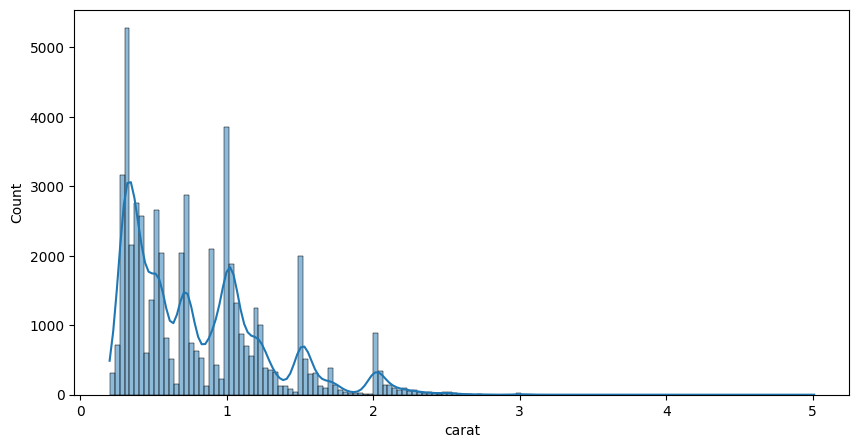

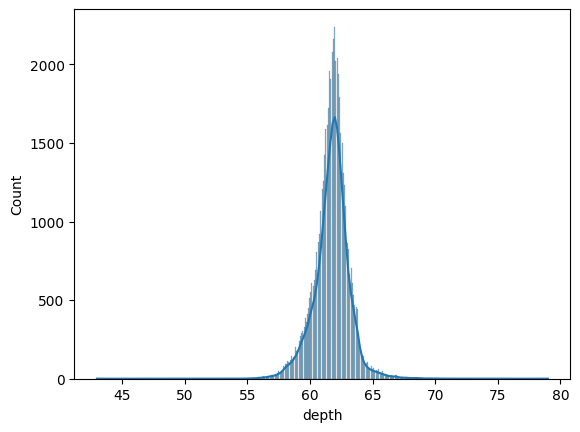

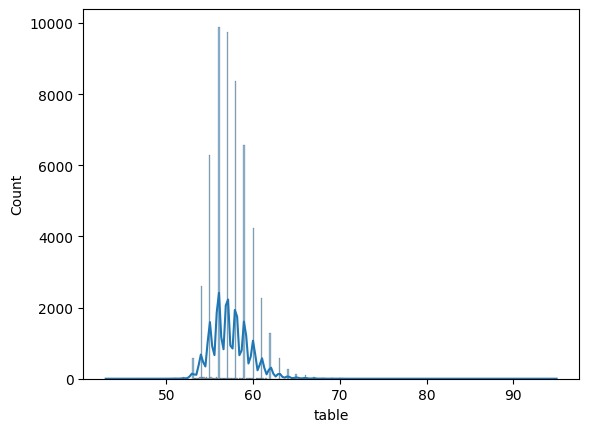

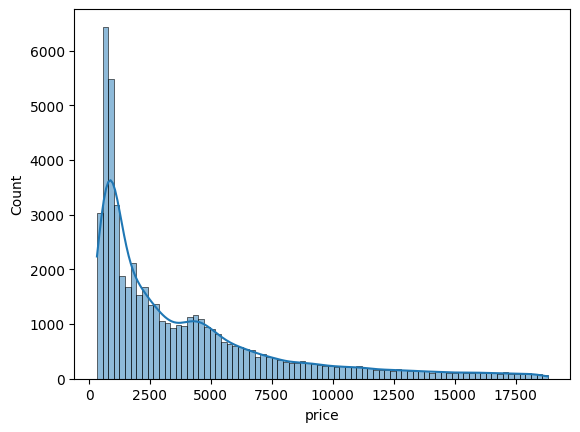

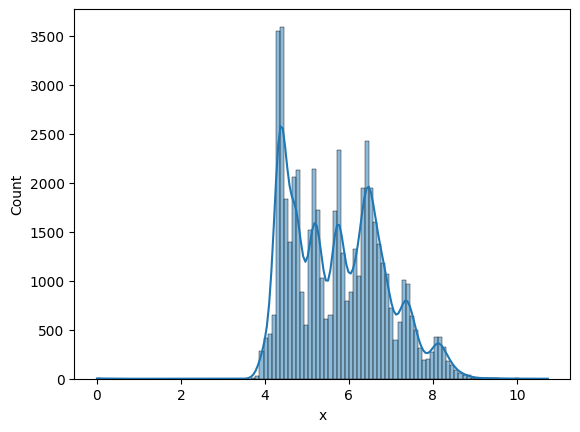

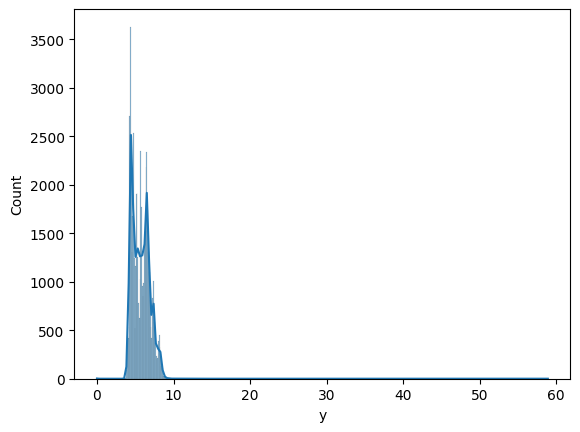

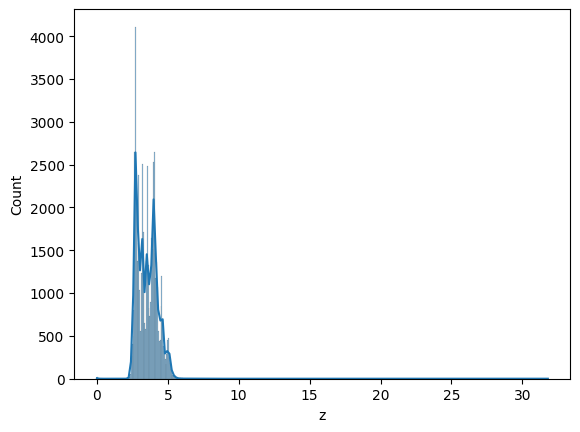

In [74]:
#numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
x=0
for i in df_numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()
    

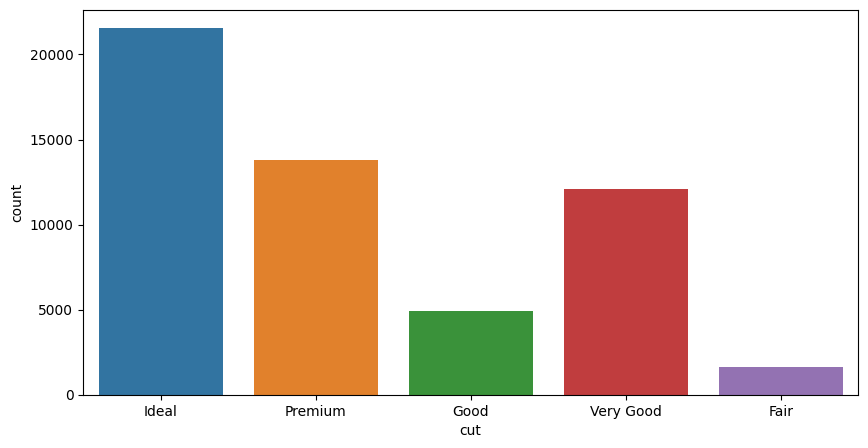

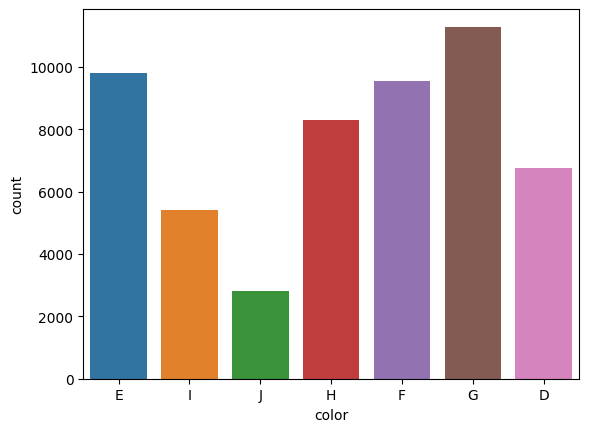

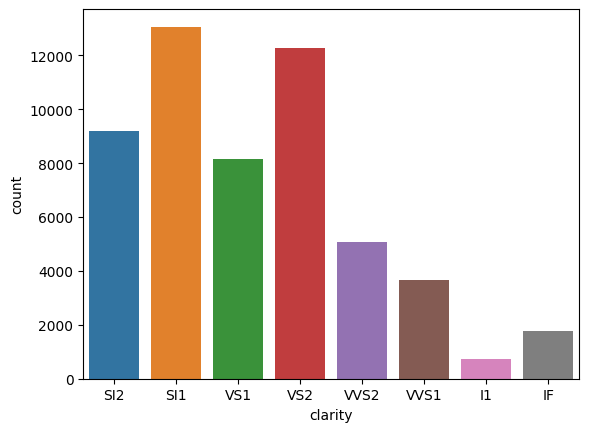

In [82]:
#for categorical columns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
x=0
for i in df_categorical_columns:
    sns.countplot(data=df,x=i,)
    print('\n')
    plt.show()
    

<Axes: >

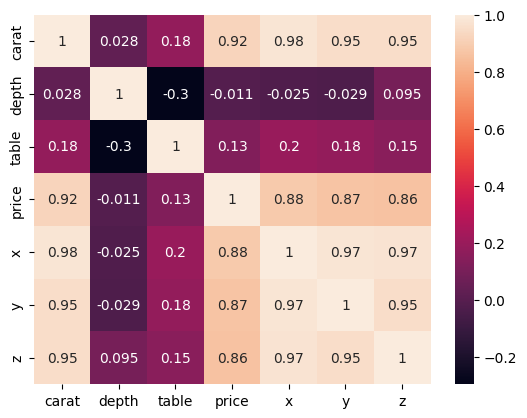

In [87]:
#correlation
sns.heatmap(df[df_numerical_columns].corr(),annot=True)

# as we see x,y,z are hihly correlated with each other and also to price

df.drop(['x','y','z'],inplace=true,axis=True)

In [89]:
#categorical decoding
df_categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [90]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [92]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [93]:
cut_map={'Ideal':5, 'Premium':4, 'Good':2, 'Very Good:':3, 'Fair':1}

In [94]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [95]:
clarity_map={'SI2':6, 'SI1':5, 'VS1':3, 'VS2':4, 'VVS2':2, 'VVS1':1, 'I1':7, 'IF':8}

In [97]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [98]:
color_map={'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1}

In [99]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
